In [26]:
import sys
if "spnhelp" in sys.modules.keys():
    del sys.modules["spnhelp"]
import spnhelp
import spn.structure.Base as spnBase
import spn.structure.leaves.parametric.Parametric as spnP
import spn.algorithms.Inference as spnInference
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

In [27]:
from scipy.stats import norm
def plot_truncated_gaussian(tail_cut : float, mean : float, sd :float, ax):
    full_domain = np.linspace(mean - 4*sd, mean + 4*sd, 100)

    x = np.linspace(norm.ppf(tail_cut/2, loc=mean, scale=sd), norm.ppf(1-tail_cut/2, loc=mean, scale=sd), 100)

    # correction = tail_cut / (norm.ppf(1-tail_cut/2, loc=mean, scale=sd) - norm.ppf(tail_cut/2, loc=mean, scale=sd))
    
    # y = norm.pdf(x, loc=mean, scale=sd) + correction
    
    # ax.plot(x, y, label="$p/$width added")
    ax.plot(x, norm.pdf(x, loc=mean, scale=sd)/(1-tail_cut), label="scaled by $1-p$")
    
    # ax.plot(full_domain, norm.pdf(full_domain, loc=mean, scale=sd), label="normal")
    ax.plot([-10, 10], [0, 0], color="black", linewidth=1.5)
    ax.legend()

# plot_truncated_gaussian(0.3, 0, 2, plt.gca())

spn size: 27


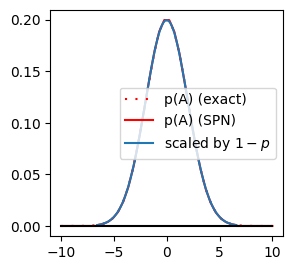

In [28]:
# print(norm.cdf(1, loc=0, scale=1)-0.5)
from lgpgm import noise
bn_A = "A" @ (2*noise)
spn = spnhelp.lgpgm_to_spn(bn_A, crit=spnhelp.CRIT_even_partition, crit_param = 27, disc_leaves=True, sloped=True)
print("spn size:", len(spn.children))
ax = spnhelp.plot_marginals(spn, bn_A)
plot_truncated_gaussian(0.001, 0, 2, ax)

In [29]:
spn.parameters

((1, 0.0006427227649154376),
 (2, 0.0013506549434687178),
 (3, 0.002674628597756114),
 (4, 0.004990923313496968),
 (5, 0.008776000747142139),
 (6, 0.014541551569552759),
 (7, 0.02270508780143219),
 (8, 0.03340672985622177),
 (9, 0.04631728415024375),
 (10, 0.060513259848183475),
 (11, 0.07450001382489696),
 (12, 0.08642920122713509),
 (13, 0.09448502599135879),
 (14, 0.09733383072840406),
 (15, 0.09448502599135808),
 (16, 0.08642920122713378),
 (17, 0.07450001382489525),
 (18, 0.06051325984818164),
 (19, 0.046317284150241986),
 (20, 0.033406729856220244),
 (21, 0.022705087801430983),
 (22, 0.01454155156955188),
 (23, 0.00877600074714154),
 (24, 0.0049909233134965885),
 (25, 0.002674628597755891),
 (26, 0.001350654943468594),
 (27, 0.0006427227649153743))

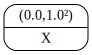

Text(0, 0.5, 'P(X)')

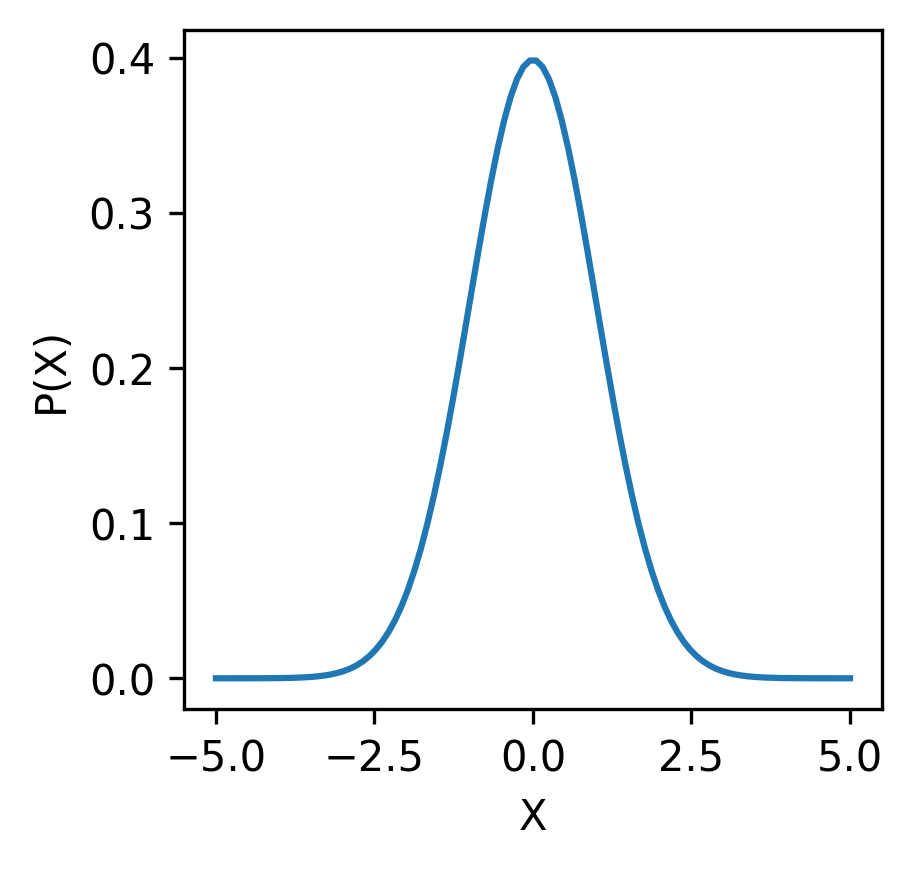

In [30]:
plt.rcParams["figure.figsize"] = (3, 3)
plt.rcParams["figure.dpi"] = 300
spn = spnP.Gaussian(mean=0, stdev=1, scope=0)
display(spnhelp.get_spn_graph(spn, ["X"]))
domain = np.linspace(-5, 5, 100)
plt.plot (domain, spnInference.likelihood(spn, domain.reshape(-1, 1)))
plt.xlabel("X")
plt.ylabel("P(X)")

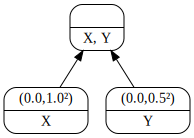

<AxesSubplot:xlabel='Y', ylabel='X'>

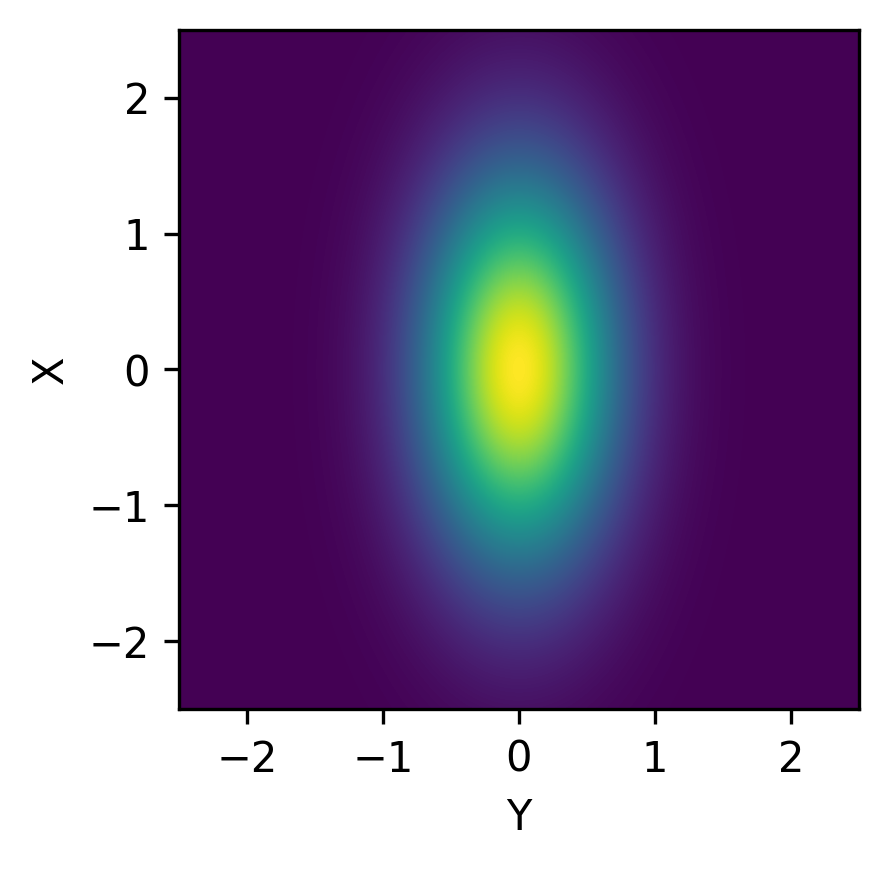

In [31]:
spn = spnP.Gaussian(mean=0, stdev=1, scope=0) * spnP.Gaussian(mean=0, stdev=0.5, scope=1)
display(spnhelp.get_spn_graph(spn, ["X", "Y"]))
info = spnhelp.get_pdf_grid_values(spn, (5, 5), (0,0), 1000)
spnhelp.show_data(info)

<AxesSubplot:>

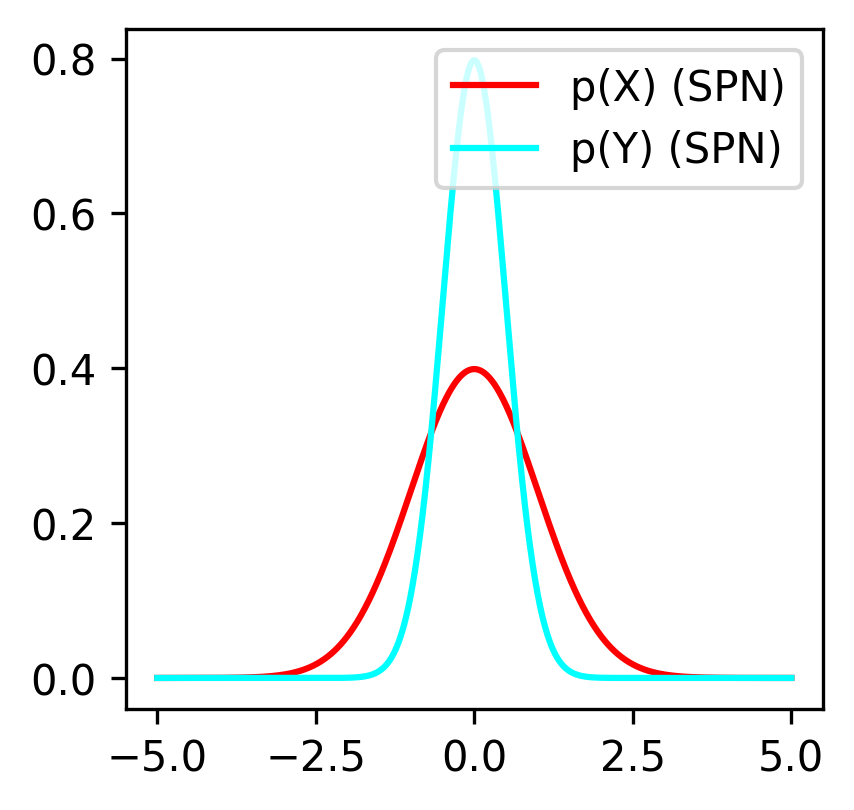

In [32]:
spnhelp.plot_marginals(spn, ["X", "Y"], xs = np.linspace(-5, 5, 1000))

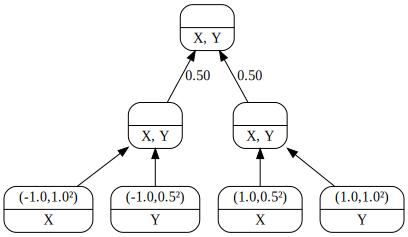

<AxesSubplot:xlabel='Y', ylabel='X'>

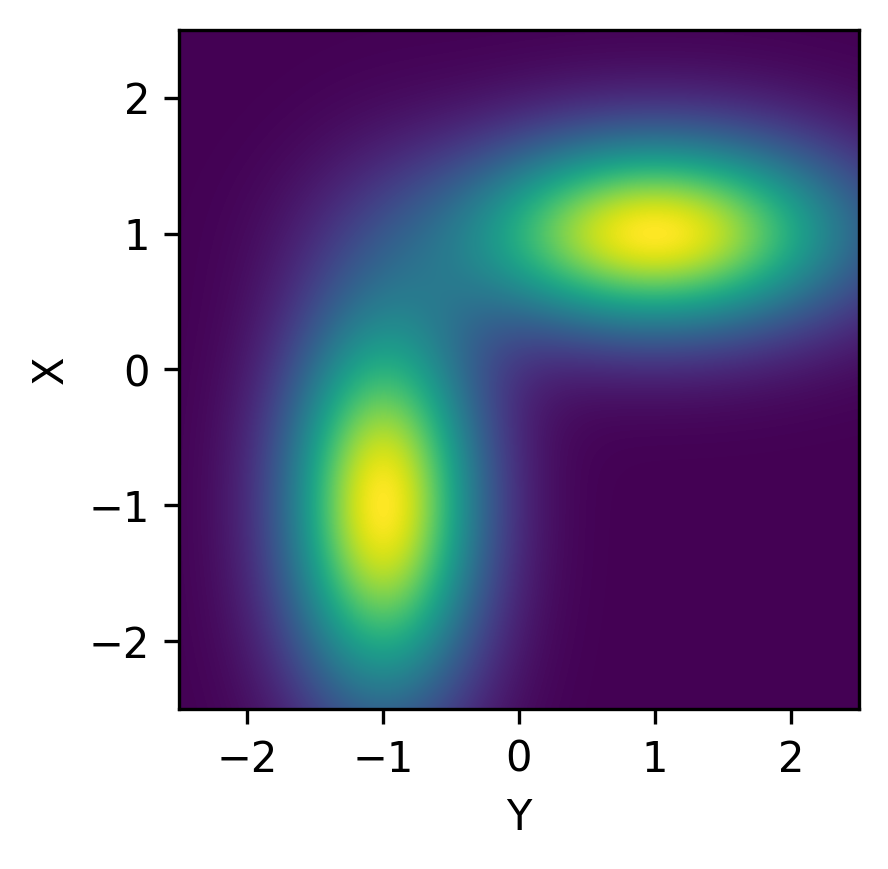

In [33]:
components = [spnP.Gaussian(mean=-1, stdev=1, scope=0) * spnP.Gaussian(mean=-1, stdev=0.5, scope=1), spnP.Gaussian(mean=1, stdev=0.5, scope=0) * spnP.Gaussian(mean=1, stdev=1, scope=1)]
spn = spnBase.Sum([0.5, 0.5], components)
spnBase.assign_ids(spn)
spnBase.rebuild_scopes_bottom_up(spn)

display(spnhelp.get_spn_graph(spn, ["X", "Y"]))
info = spnhelp.get_pdf_grid_values(spn, (5, 5), (0,0), 1000)
spnhelp.show_data(info)

<AxesSubplot:>

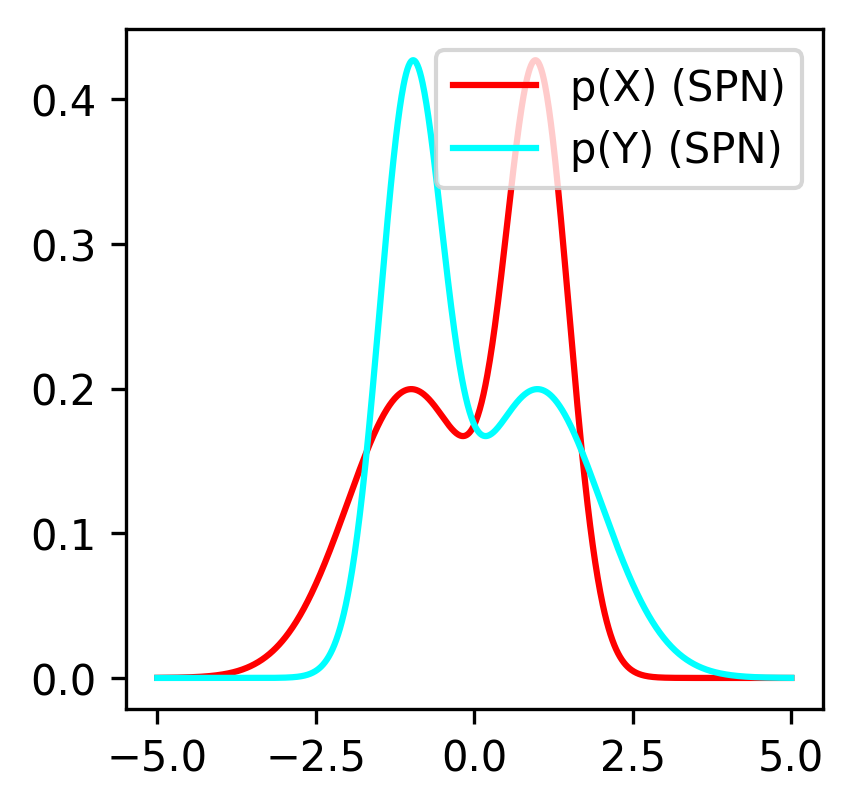

In [34]:
spnhelp.plot_marginals(spn, ["X", "Y"], xs = np.linspace(-5, 5, 1000))